# TFM. Modelo
## MVP

## Importacion de librerias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

## Modelo

In [2]:
df_data = pd.read_pickle('./data/df_data')

In [3]:
df_data.head()

,index,total,Bag 14,Bag 19,Burofax,Devolución burofax,Documentos 14,E-Commerce,E-commerce canje,Ecobox 25,Express documentos,Express paquetes,Mrw economy (ecopaq),OperativaServicioEnumECOBA,OperativaServicioEnumU19E;U19;E,Plan ayuda,Retorno albarán,Retorno burofax,Retorno canje,Urgente 14,Urgente 14 expedición,Urgente funchal,Urgente hoy,NaN,Friday,Monday,Thursday,Tuesday,Wednesday,dateCreacion
1,2019-01-02,7.561642,0.0,1.609438,2.639057,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.0,0.0,2.564949,0.0,0.0,0.0,1.945910,0.0,0.0,0.0,0.0,1.0,281.0
2,2019-01-03,7.249926,0.0,0.000000,2.484907,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,1.609438,0.0,0.0,0.0,3.135494,0.0,0.0,1.0,0.0,0.0,283.0
3,2019-01-04,8.077137,0.0,0.000000,2.302585,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.098612,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,351.0
6,2019-01-07,8.432724,0.0,0.000000,1.945910,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.0,0.0,1.791759,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,173.0
7,2019-01-08,7.980708,0.0,0.693147,1.609438,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.401197,0.0,0.0,2.079442,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,174.0


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [5]:
reg = LinearRegression()

In [6]:
#X = df_explore.loc[:,['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']]
X = df_data.iloc[:,1:-1]
y = df_data['dateCreacion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
X.columns

Index([                          'total',                          'Bag 14',
                                'Bag 19',                         'Burofax',
                    'Devolución burofax',                   'Documentos 14',
                            'E-Commerce',                'E-commerce canje',
                             'Ecobox 25',              'Express documentos',
                      'Express paquetes',            'Mrw economy (ecopaq)',
            'OperativaServicioEnumECOBA', 'OperativaServicioEnumU19E;U19;E',
                            'Plan ayuda',                 'Retorno albarán',
                       'Retorno burofax',                   'Retorno canje',
                            'Urgente 14',           'Urgente 14 expedición',
                       'Urgente funchal',                     'Urgente hoy',
                                     nan,                          'Friday',
                                'Monday',                        'Thursday',

In [8]:
reg.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred = reg.predict(X_test)

In [10]:
mean_absolute_error(y_test, y_pred)

79.31588993553892

In [11]:
analisisX = df_data.iloc[:,-1].reset_index()
analisisX = analisisX['dateCreacion']

analisisPre = reg.predict(X)
analisisPre = pd.DataFrame(analisisPre)
#analisisX, analisisPre

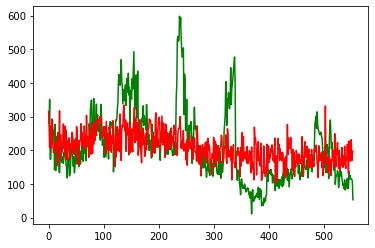

In [12]:
plt.plot(analisisX, c='green')
plt.plot(analisisPre, c='red')

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [14]:
reg_gs = GridSearchCV(KNeighborsRegressor(),
                        param_grid={"n_neighbors":np.arange(3,50)})

In [15]:
reg_gs.fit(X,y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [16]:
reg_gs.best_params_, reg_gs.best_score_

({'n_neighbors': 49}, -0.5109797486957781)

In [17]:
regk = KNeighborsRegressor(n_neighbors=3)

In [18]:
regk.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [19]:
y_predk = regk.predict(X_test)

In [20]:
#MAE
mean_absolute_error(y_test, y_predk)

76.13213213213214

In [21]:
cross_val_score(regk,X,y,scoring='neg_mean_absolute_error').mean()

-89.4274529074529

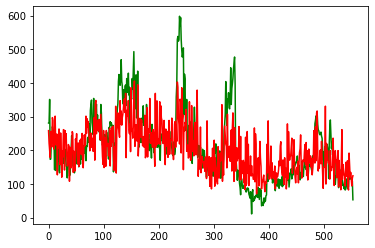

In [22]:
analisisPre = regk.predict(X)
analisisPre = pd.DataFrame(analisisPre)
analisisPre

plt.plot(analisisX, c='green')
plt.plot(analisisPre, c='red')